In [1]:
import pandas as pd

# Load Togo dataset 
df = pd.read_csv("../data/togo-dapaong_qc.csv")

# Basic info
print(df.shape)
df.head()

(525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [3]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,230.555040,322.532347,-12.7,-2.2,2.1,442.400,1424.0
DNI,525600.0,151.258469,250.956962,0.0,0.0,0.0,246.400,1004.5
DHI,525600.0,116.444352,156.520714,0.0,0.0,2.5,215.700,805.7
ModA,525600.0,226.144375,317.346938,0.0,0.0,4.4,422.525,1380.0
ModB,525600.0,219.568588,307.932510,0.0,0.0,4.3,411.000,1367.0
Tamb,525600.0,27.751788,4.758023,14.9,24.2,27.2,31.100,41.4
RH,525600.0,55.013160,28.778732,3.3,26.5,59.3,80.800,99.8
WS,525600.0,2.368093,1.462668,0.0,1.4,2.2,3.200,16.1
WSgust,525600.0,3.229490,1.882565,0.0,1.9,2.9,4.400,23.1
WSstdev,525600.0,0.557740,0.268923,0.0,0.4,0.5,0.700,4.7


In [4]:
from scipy import stats
import numpy as np

# Drop Comments
df = df.drop(columns=["Comments"], errors="ignore")

# Replace negative irradiance values
irr_cols = ["GHI", "DNI", "DHI"]
for col in irr_cols:
    df.loc[df[col] < 0, col] = np.nan
    df[col] = df[col].fillna(df[col].median())

# Z-score outlier filtering
num_cols = ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"]
z = np.abs(stats.zscore(df[num_cols], nan_policy='omit'))
df_clean = df[(z < 3).all(axis=1)]

print("Original shape:", df.shape)
print("Cleaned shape:", df_clean.shape)


Original shape: (525600, 18)
Cleaned shape: (515748, 18)


Time-Series Analysis

C:\Users\betteyk\AppData\Local\Temp\ipykernel_18192\2508952075.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Timestamp"] = pd.to_datetime(df_clean["Timestamp"])


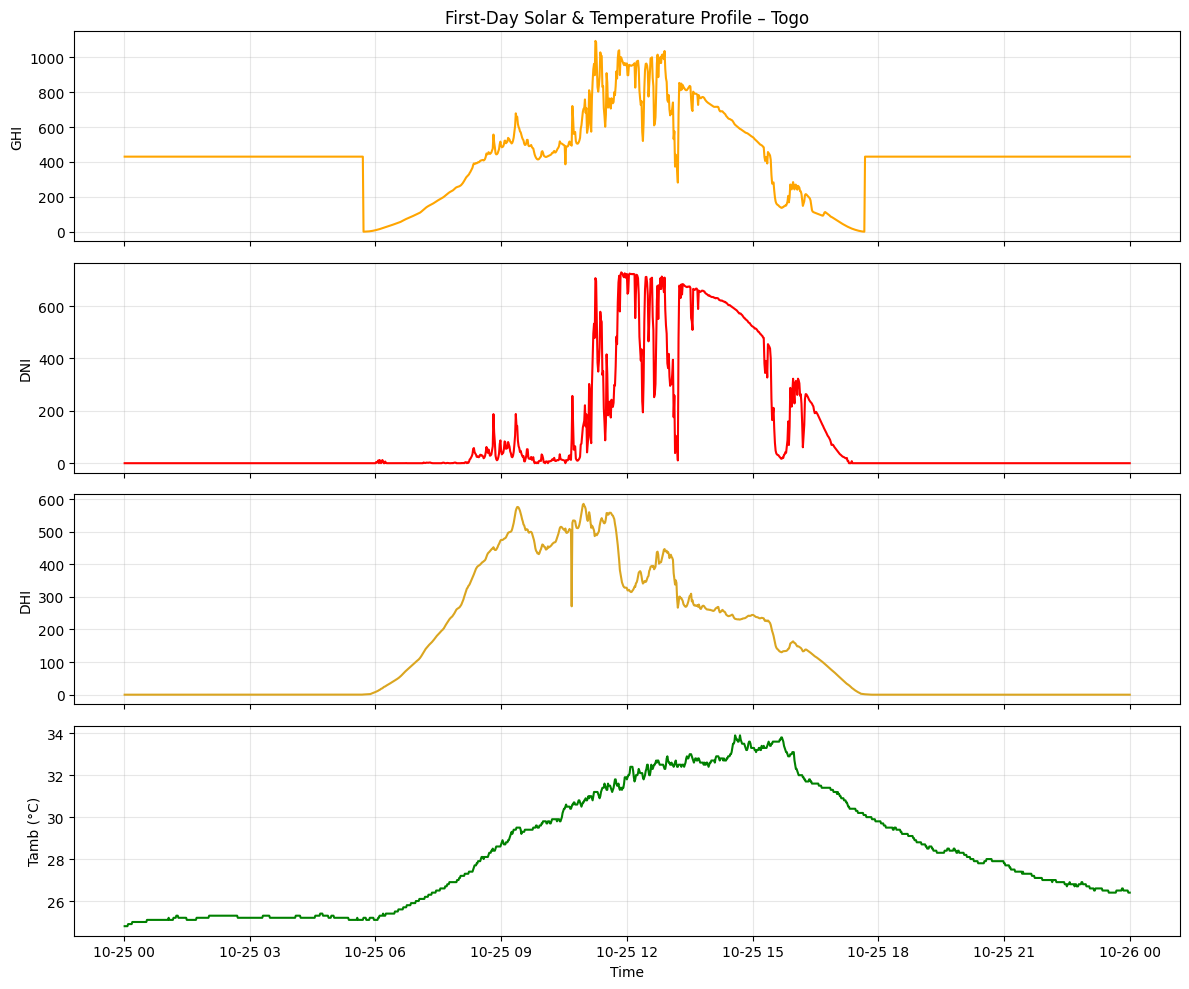

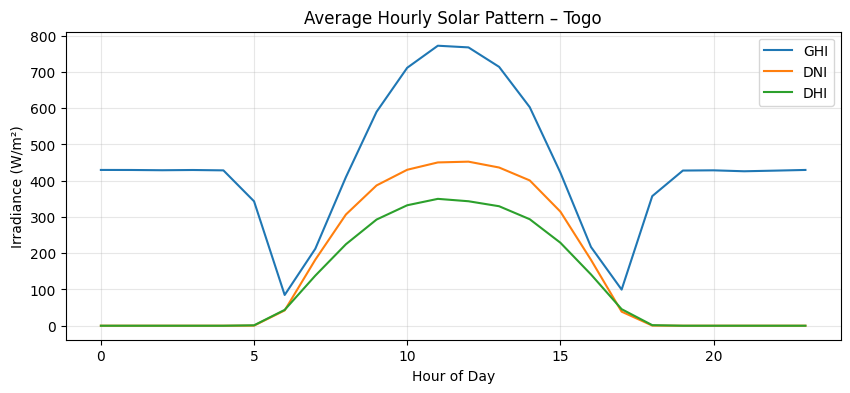

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

df_clean["Timestamp"] = pd.to_datetime(df_clean["Timestamp"])
df_clean = df_clean.sort_values("Timestamp")

# --- Plot first 24 hours
day_slice = df_clean.iloc[:1440]
fig, axes = plt.subplots(4, 1, figsize=(12,10), sharex=True)
axes[0].plot(day_slice["Timestamp"], day_slice["GHI"], color="orange")
axes[1].plot(day_slice["Timestamp"], day_slice["DNI"], color="red")
axes[2].plot(day_slice["Timestamp"], day_slice["DHI"], color="goldenrod")
axes[3].plot(day_slice["Timestamp"], day_slice["Tamb"], color="green")
axes[0].set_title("First-Day Solar & Temperature Profile – Togo")
for ax, lab in zip(axes, ["GHI","DNI","DHI","Tamb (°C)"]):
    ax.set_ylabel(lab); ax.grid(True, alpha=0.3)
axes[-1].set_xlabel("Time")
plt.tight_layout(); plt.show()

# --- Hourly averages
df_clean["hour"] = df_clean["Timestamp"].dt.hour
hourly = df_clean.groupby("hour")[["GHI","DNI","DHI","Tamb"]].mean()
plt.figure(figsize=(10,4))
plt.plot(hourly.index, hourly["GHI"], label="GHI")
plt.plot(hourly.index, hourly["DNI"], label="DNI")
plt.plot(hourly.index, hourly["DHI"], label="DHI")
plt.xlabel("Hour of Day"); plt.ylabel("Irradiance (W/m²)")
plt.title("Average Hourly Solar Pattern – Togo")
plt.legend(); plt.grid(True, alpha=0.3); plt.show()


 Cleaning Impact
Compare average ModA and ModB before/after cleaning events

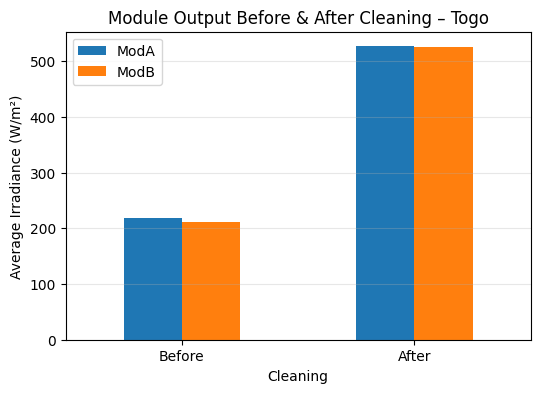

In [6]:
if {"Cleaning","ModA","ModB"}.issubset(df_clean.columns):
    df_clean.groupby("Cleaning")[["ModA","ModB"]].mean().plot(kind="bar", figsize=(6,4))
    plt.title("Module Output Before & After Cleaning – Togo")
    plt.ylabel("Average Irradiance (W/m²)")
    plt.xticks([0,1], ["Before","After"], rotation=0)
    plt.grid(True, axis="y", alpha=0.3)
    plt.show()
else:
    print("Skip: Missing Cleaning/ModA/ModB columns.")


##  Correlation & Relationship Analysis
Heatmap and scatter plots showing variable relationships.


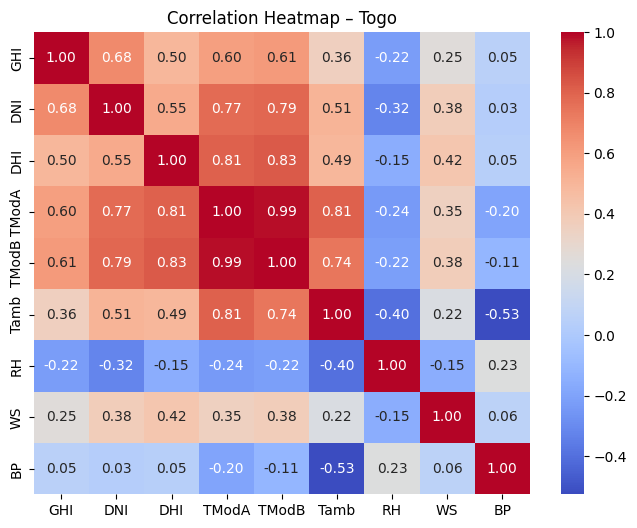

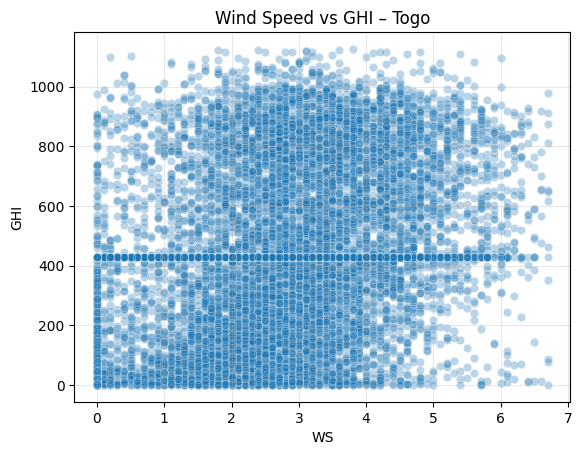

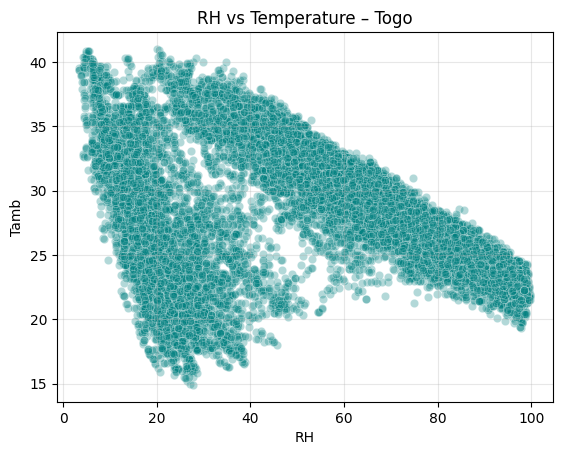

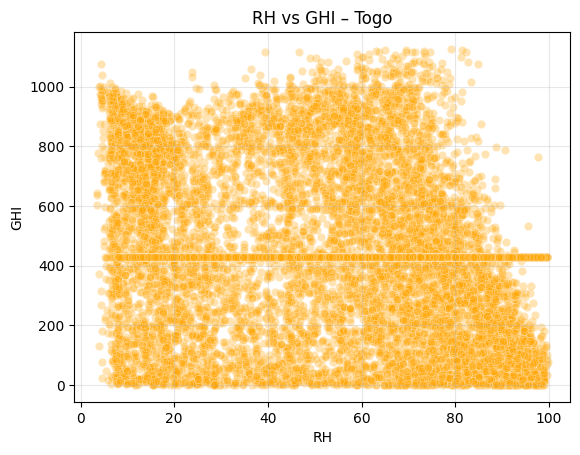

In [7]:
corr_cols = [c for c in ["GHI","DNI","DHI","TModA","TModB","Tamb","RH","WS","BP"] if c in df_clean.columns]
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap – Togo"); plt.show()

# Wind speed vs GHI
sns.scatterplot(x="WS", y="GHI", data=df_clean.sample(n=min(20000,len(df_clean)), random_state=42), alpha=0.3)
plt.title("Wind Speed vs GHI – Togo"); plt.grid(True, alpha=0.3); plt.show()

# Humidity vs Temperature
sns.scatterplot(x="RH", y="Tamb", data=df_clean.sample(n=min(20000,len(df_clean)), random_state=42), alpha=0.3, color="teal")
plt.title("RH vs Temperature – Togo"); plt.grid(True, alpha=0.3); plt.show()

# RH vs GHI
sns.scatterplot(x="RH", y="GHI", data=df_clean.sample(n=min(20000,len(df_clean)), random_state=42), alpha=0.3, color="orange")
plt.title("RH vs GHI – Togo"); plt.grid(True, alpha=0.3); plt.show()


##  Wind & Distribution Analysis
Distributions for key variables and simple wind-rose visualization.


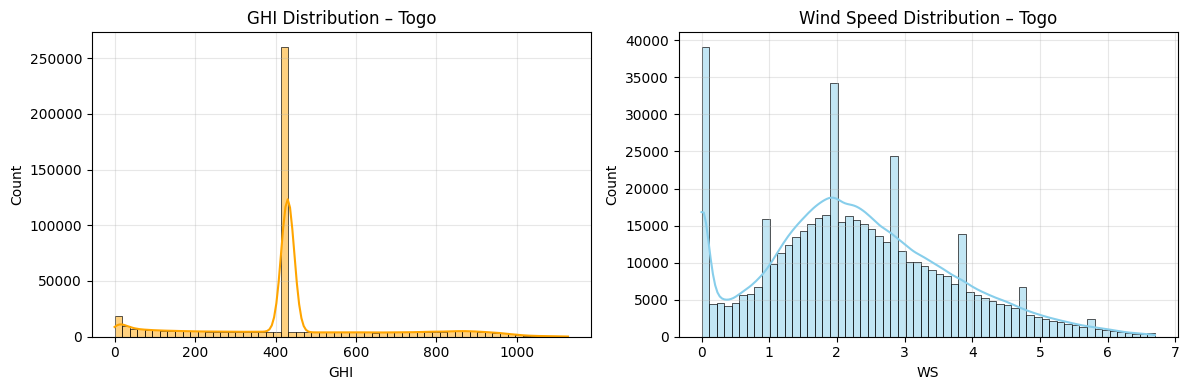

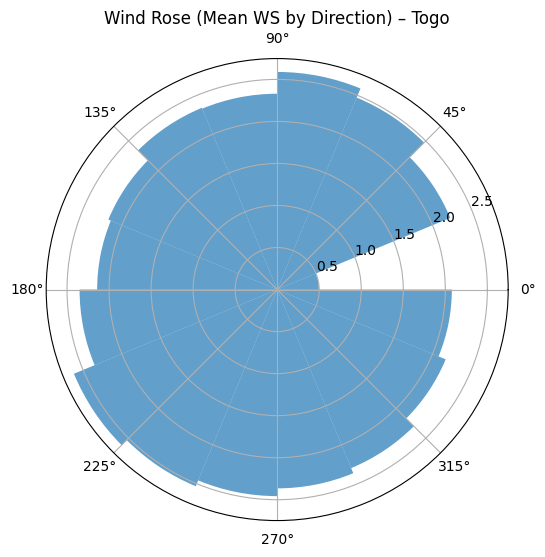

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(df_clean["GHI"], bins=60, kde=True, ax=axes[0], color="orange")
axes[0].set_title("GHI Distribution – Togo")
sns.histplot(df_clean["WS"], bins=60, kde=True, ax=axes[1], color="skyblue")
axes[1].set_title("Wind Speed Distribution – Togo")
for ax in axes: ax.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

# Simple wind-rose (mean WS per direction sector)
import numpy as np
wd = np.deg2rad(df_clean["WD"].to_numpy())
ws = df_clean["WS"].to_numpy()
bins = np.linspace(0, 2*np.pi, 17)
sector = np.digitize(wd, bins) - 1
sector_mean = [ws[sector==i].mean() if np.any(sector==i) else 0 for i in range(len(bins)-1)]
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
theta = (bins[:-1] + bins[1:]) / 2
ax.bar(theta, sector_mean, width=(2*np.pi/16), alpha=0.7)
ax.set_title("Wind Rose (Mean WS by Direction) – Togo")
plt.show()


## Temperature Analysis – Effect of Humidity
Explore how relative humidity affects temperature and irradiance.


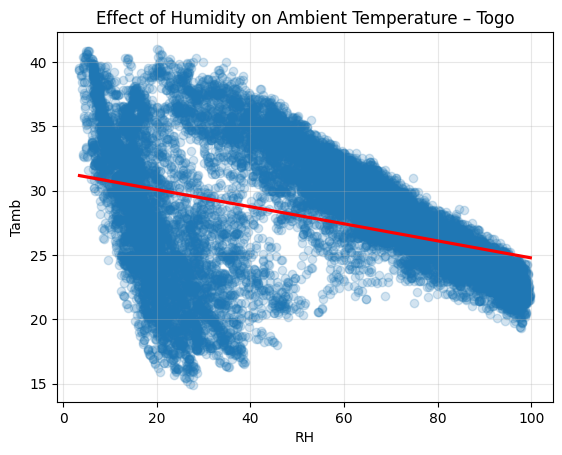

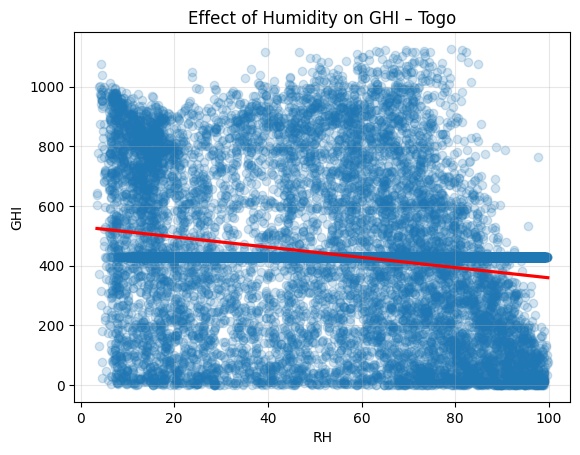

In [9]:
# RH vs Tamb
sns.regplot(x="RH", y="Tamb", data=df_clean.sample(n=min(20000,len(df_clean)), random_state=42),
            scatter_kws={"alpha":0.2}, line_kws={"color":"red"})
plt.title("Effect of Humidity on Ambient Temperature – Togo")
plt.grid(True, alpha=0.3); plt.show()

# RH vs GHI
sns.regplot(x="RH", y="GHI", data=df_clean.sample(n=min(20000,len(df_clean)), random_state=42),
            scatter_kws={"alpha":0.2}, line_kws={"color":"red"})
plt.title("Effect of Humidity on GHI – Togo")
plt.grid(True, alpha=0.3); plt.show()


##  Bubble Chart – Temperature vs GHI (bubble size/color = RH)


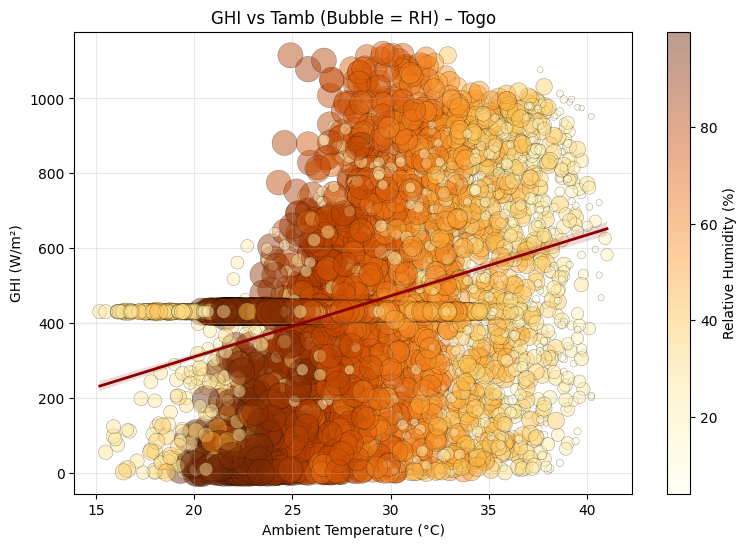

In [10]:
sample = df_clean.sample(n=min(8000, len(df_clean)), random_state=42)
plt.figure(figsize=(9,6))
sc = plt.scatter(sample["Tamb"], sample["GHI"], s=sample["RH"]*4, c=sample["RH"],
                 cmap="YlOrBr", alpha=0.45, edgecolors="k", linewidth=0.3)
sns.regplot(x="Tamb", y="GHI", data=sample, scatter=False, color="darkred", line_kws={"linewidth":2})
plt.colorbar(sc, label="Relative Humidity (%)")
plt.title("GHI vs Tamb (Bubble = RH) – Togo")
plt.xlabel("Ambient Temperature (°C)"); plt.ylabel("GHI (W/m²)")
plt.grid(True, alpha=0.3); plt.show()


In [11]:
df_clean.to_csv("../data/togo_clean.csv", index=False)
print("✅ Saved: data/togo_clean.csv (excluded from GitHub)")


✅ Saved: data/togo_clean.csv (excluded from GitHub)
